# Reading the Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [94]:
df = pd.read_csv('D:/BURO/Data Science/Internshala/4. Predicitve Modelling/1. Reading the Data/data.csv')

In [95]:
df.shape

(891, 12)

In [96]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable Identification

In [98]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Thus, there are 7 continuous variables and 5 categorical variables.

# Univariate Analysis

# 1. Univariate Analysis for Continous Variables

In [99]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# The 20-30 age group seems to be the dominant age group

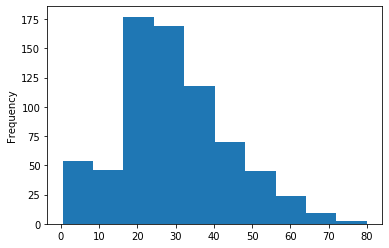

In [100]:
#plotting a histogram for 'Age' variable:

df['Age'].plot.hist()

# Most of the tickets bought were under 50

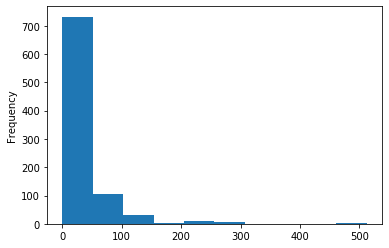

In [101]:
#plotting a histogram for 'Fare' variable:

df['Fare'].plot.hist()

# 2. Univariate Analysis for Categorical Variables

# There are more male passengers in the group than female

In [102]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# In percentage terms, the male passengers equals approximately three-fifths of the total crew passengers

In [103]:
df['Sex'].value_counts()/len(df['Sex'])*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

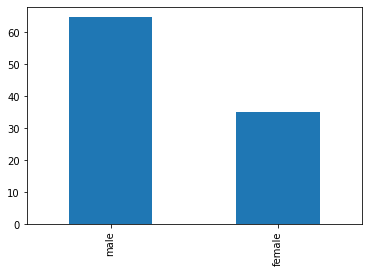

In [104]:
(df['Sex'].value_counts()/len(df['Sex'])*100).plot.bar()

# Bivariate Analysis

# Continuous-Continuous Bivariate Analysis

# There seems to be no significant relationship between Age and Fare

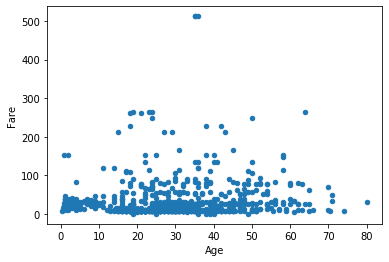

In [105]:
df.plot.scatter('Age', 'Fare')

In [106]:
# correlation between Age and Fare:

df['Age'].corr(df['Fare'])

0.09606669176903887

# Categorical - Continuous variables

# Male passengers, on an average, are older than their female counterparts

In [107]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

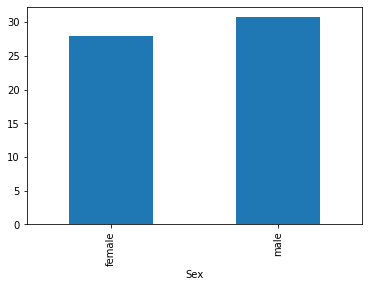

In [108]:
df.groupby('Sex')['Age'].mean().plot.bar()

In [109]:
#Testing for statistical significance of the difference in means:

from scipy.stats import ttest_ind

In [110]:
males=df[df['Sex']=='male']
females=df[df['Sex']=='female']

In [111]:
ttest_ind(males['Age'],females['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

# Categorical - Categorical variables


# Females are more likely to survive than their male counterparts

In [112]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [113]:
#checking whether the difference in the surivival rates of male and females are statistical significant:

from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['Sex'], df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

# Outlier: Detection and Treatment

# Univariate Variables

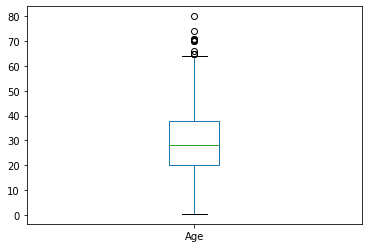

In [114]:
#checking for outliers using box plot:

df['Age'].plot.box()

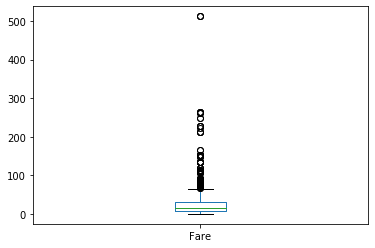

In [115]:
#checking for outliers using box plot:

df['Fare'].plot.box()

# Bivariate Variables

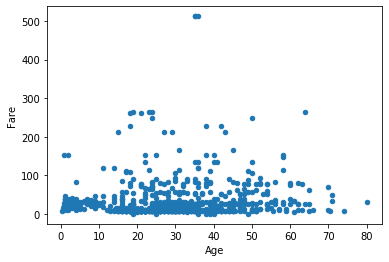

In [116]:
#checking for outliers using scatter plot:

df.plot.scatter('Age', 'Fare')

# Treating Outliers

In [117]:
#Removing outliers from the 'Fare' dataset:

df1=df[df['Fare']<300]

In [118]:
np.mean(df['Age'])

29.69911764705882

In [119]:
#Treating outliers from the 'Age' dataset by replacing outliers with their mean values:

df1.loc[df1['Age']>65,'Age'] = 23.329676365554743

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Model Building

# Using logistic regression to predict the survival rate

# Fitting the Model:

In [120]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [121]:
#Generating dummies for categorical variables: 

df1=pd.get_dummies(df)

In [122]:
#considering missing values:

df1.fillna(0, inplace=True)

In [123]:
df1.shape

(891, 1731)

In [124]:
#Dividing the dataset into train and test dataset:

train=df1[0:697]
test=df1[698:888]

In [125]:
#Dividing train dataset into target variable (y) and feature variables (x):

x_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [126]:
#Dividing test dataset:

x_test = test.drop('Survived',axis=1)
true_p = test['Survived']

In [127]:
#importing necessary for Logistic Regression:

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [128]:
#Training our model:

logreg.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
#Trying to predict the survival:

y_pred=logreg.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

# Model Validation:

In [130]:
#Checking for accuracy of our model using Score function:

logreg.score(x_test, true_p)

0.8263157894736842

Our model is thus 83.68% accurate

In [131]:
logreg.score(x_train, y_train)

0.9225251076040172

In [132]:
#Confusion Matrix:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(true_p, y_pred)
print(confusion_matrix)

[[107  13]
 [ 20  50]]


The result tells us that we have (108+51) correct predictions and (19+12) incorrect predictions.

In [133]:
#Measuring precision using F-test:

from sklearn.metrics import classification_report
print(classification_report(true_p, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       120
           1       0.79      0.71      0.75        70

    accuracy                           0.83       190
   macro avg       0.82      0.80      0.81       190
weighted avg       0.82      0.83      0.82       190



Our model, thus has on average, a 84% precision of accurately predicting the survival rate.

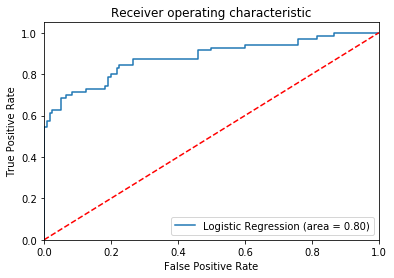

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(true_p, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(true_p, logreg.predict_proba(x_test)[:,1])
plt.pyplot.figure()
plt.pyplot.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.pyplot.plot([0, 1], [0, 1],'r--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic')
plt.pyplot.legend(loc="lower right")
plt.pyplot.savefig('Log_ROC')
plt.pyplot.show()

Clearly, our classifier is a lot far away from the ROC curve.